# Introduction to DEA Mangroves <img align="right" src="../Supplementary_data/dea_logo.jpg">

* **[Sign up to the DEA Sandbox](https://app.sandbox.dea.ga.gov.au/)** to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with the `DEA Sandbox` environment
* **Products used:** 
[ga_ls_mangrove_cover_cyear_3](https://explorer.dea.ga.gov.au/products/ga_ls_mangrove_cover_cyear_3)

## Background

Mangroves are unique, valuable and vulnerable woody plant species that inhabit intertidal regions around much of the Australian coastline.

They provide a diverse array of ecosystem services such as:

* coastal protection
* carbon storage
* nursery grounds and habitat for a huge variety of avian, coastal and marine animal species.

However, mangrove ecosystems are impacted upon by both natural and anthropogenic drivers of change such as sea-level rise, coastal land reclaimation and severe tropical cyclone damage.
In Australia, mangroves are protected by law and consequently, changes in their extent and canopy density are driven predominantly by natural drivers.

Modelling mangrove canopy density offers an effective mechanism to assess how mangroves are responding to these external influences and to monitor their recovery to ensure that they can continue to thrive and support our vital coastal ecosystems.

### What this product offers

The [DEA Mangroves](https://knowledge.dea.ga.gov.au/data/product/dea-mangrove-canopy-cover-landsat) data product maps the annual canopy cover density of Australian mangroves within a fixed extent around the entire continental coastline. 
The extent represents a union of [Global Mangrove Watch layers](https://data.unep-wcmc.org/datasets/45) for multiple years, produced by the Japanese Aerospace Exploration Agency.

Within this extent, mangroves are identified by leveraging a relationship between the 10th percentile green vegetation component of the DEA [Fractional Cover](https://knowledge.dea.ga.gov.au/data/product/dea-fractional-cover-landsat) data product with Light Detection And Ranging (LiDAR)-derived Planimetric Canopy Cover% (PCC).
More detail on the method can be found [here](https://www.sciencedirect.com/science/article/pii/S0034425719301890?via%3Dihub).

Three cover classes are identified within the product which are defined as:

* Closed Forest -  pixels with more than 80 % mangrove canopy cover
* Open Forest - pixels with between 50 % and 80 % canopy cover
* Woodland - pixels with between 20 % and 50 % canopy cover

### Publications

* Lymburner, L., Bunting, P., Lucas, R., Scarth, P., Alam, I., Phillips, C., Ticehurst, C., & Held, A., (2020). Mapping the multi-decadal mangrove dynamics of the Australian coastline. Remote Sensing of Environment, 238, 111185. Available at: https://doi.org/10.1016/j.rse.2019.05.004

## Description

This notebook introduces the DEA Mangroves data product and steps through how to:

1. View the product name and associated measurements in the DEA database
2. Load the dataset and view the data classes within it
3. Plot a single timestep image
4. Create and view an animation of the whole timeseries
5. Plot change over time by graphing the timeseries of each class
6. Identify hotspot change areas within each class

<div class="alert alert-info">
    
**Note:** Visit the [DEA Mangroves product documentation](https://knowledge.dea.ga.gov.au/data/product/dea-mangrove-canopy-cover-landsat) for detailed technical information including methods, quality, and data access.
    
</div>

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [1]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datacube.utils import masking
from IPython.core.display import Video
from matplotlib.colors import LinearSegmentedColormap

import sys

sys.path.insert(1, "../Tools/")
from dea_tools.plotting import display_map, xr_animation

### Connect to the datacube

Connect to the datacube so we can access DEA data.
The `app` parameter is a unique name for the analysis which is based on the notebook file name.

In [2]:
dc = datacube.Datacube(app="DEA_Mangroves")

## Available products and measurements

### List products available in Digital Earth Australia

In [3]:
dc_products = dc.list_products()
dc_products.loc[["ga_ls_mangrove_cover_cyear_3"]]

,name,description,license,default_crs,default_resolution
name,,,,,
ga_ls_mangrove_cover_cyear_3,ga_ls_mangrove_cover_cyear_3,Geoscience Australia Landsat Mangrove Cover Ca...,CC-BY-4.0,EPSG:3577,"(-30, 30)"


### List measurements

View the list of measurements associated with the DEA Mangroves product.
Note the single measurement unit, the nodata value and the flags_definitions.

In [4]:
dc_measurements = dc.list_measurements()
dc_measurements.loc[["ga_ls_mangrove_cover_cyear_3"]]

,,name,dtype,units,nodata,aliases,flags_definition
product,measurement,,,,,,
ga_ls_mangrove_cover_cyear_3,canopy_cover_class,canopy_cover_class,uint8,1,255,NaN,"{'woodland': {'bits': [0, 1, 2, 3, 4, 5, 6, 7]..."


## Loading data

### Select and view your study area

**If running the notebook for the first time,** keep the default settings below.
This will demonstrate how the analysis works and provide meaningful results.
Zoom around the displayed map to understand the context of the analysis area.
To select a new area, click on the map to reveal the Latitude (`y`) and Longitude (`x`) for diagonally opposite corners and place these values into the `query`

Replace the `y` and `x` coordinates to try the following locations:

* Bowling Green Bay, Qld
    * "y": (-19.50688750115376, -19.27501266742088)
    * "x": (147.05183029174404, 147.47617721557216)
* Pellew Islands, NT
    * "y": (-15.6786, -16.0075)
    * "x": (136.5360, 137.0682)

In [5]:
# Set up a region to load data -27.26, -27.30; 153.047, 153.087
query = {
    "y": (-27.26, -27.30),
    "x": (153.047, 153.087),
    "time": ("1988", "2023"),
}
display_map(x=query["x"], y=query["y"])

### Load and view DEA Mangroves

In [6]:
# Load data from the DEA datacube catalogue
mangroves = dc.load(product="ga_ls_mangrove_cover_cyear_3", **query)
mangroves

<xarray.Dataset> Size: 945kB
Dimensions:             (time: 36, y: 170, x: 154)
Coordinates:
  * time                (time) datetime64[ns] 288B 1988-07-01T23:59:59.999999...
  * y                   (y) float64 1kB -3.125e+06 -3.125e+06 ... -3.13e+06
  * x                   (x) float64 1kB 2.049e+06 2.049e+06 ... 2.053e+06
    spatial_ref         int32 4B 3577
Data variables:
    canopy_cover_class  (time, y, x) uint8 942kB 255 255 255 255 ... 255 255 255
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

### View the DEA Mangroves class values and definitions

You'll see that four classes are identified in this dataset.
The `notobserved` class was separated from `nodata` pixels in this workflow to identify locations where mangroves have been observed but there is poor observation density.
This class is usually insignificant in size and has not been included in the remainder of this notebook analysis.

In [7]:
# Extract the flags information from the dataset
flags = masking.describe_variable_flags(mangroves)
flags["bits"] = flags["bits"].astype(str)
flags = flags.sort_values(by="bits")

# Append the class descriptions to each class
descriptors = {
    "closed_forest": "> 80 % canopy cover",
    "open_forest": "50 - 80 % canopy cover",
    "woodland": "20 - 50 % canopy cover",
    "notobserved": "Fewer than 3 clear observations",
}
flags = flags.rename(columns={"description": "class"})
flags["description"] = pd.Series(data=descriptors, index=flags.index)

# View the values in the dataset that are associated with each class
flags

,bits,values,class,description
woodland,"[0, 1, 2, 3, 4, 5, 6, 7]",{'1': True},Woodland,20 - 50 % canopy cover
notobserved,"[0, 1, 2, 3, 4, 5, 6, 7]",{'0': True},Mangroves not observed,Fewer than 3 clear observations
open_forest,"[0, 1, 2, 3, 4, 5, 6, 7]",{'2': True},Open Forest,50 - 80 % canopy cover
closed_forest,"[0, 1, 2, 3, 4, 5, 6, 7]",{'3': True},Closed Forest,> 80 % canopy cover


## Plotting data

### Plot a single timestep

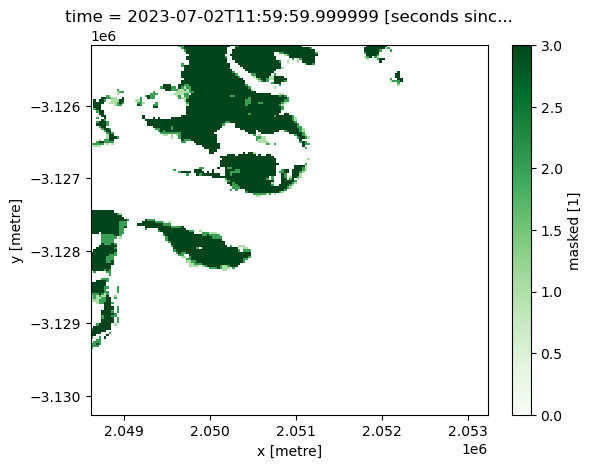

In [8]:
# Firstly, mask out the nodata values
mangroves["masked"] = mangroves.canopy_cover_class.where(mangroves.canopy_cover_class != 255)

# Plot the most recent timestep
mangroves["masked"].isel(time=-1).plot(cmap="Greens")

### View all timesteps as an animation

In [9]:
# Produce a time series animation of mangrove canopy cover
xr_animation(
    ds=mangroves,
    bands=["masked"],
    output_path="DEA_Mangroves.mp4",
    annotation_kwargs={"fontsize": 20, "color": "white"},
    show_date="%Y",
    imshow_kwargs={"cmap": "Greens"},
    show_colorbar=True,
    interval=1000,
    width_pixels=800,
)

# Plot animation
plt.close()

# View and interact with the animation
Video("DEA_Mangroves.mp4", embed=True)

Exporting animation to DEA_Mangroves.mp4


  0%|          | 0/36 (0.0 seconds remaining at ? frames/s)

## Plot the area (number of pixels) occupied by each class at every timestep in the area of interest

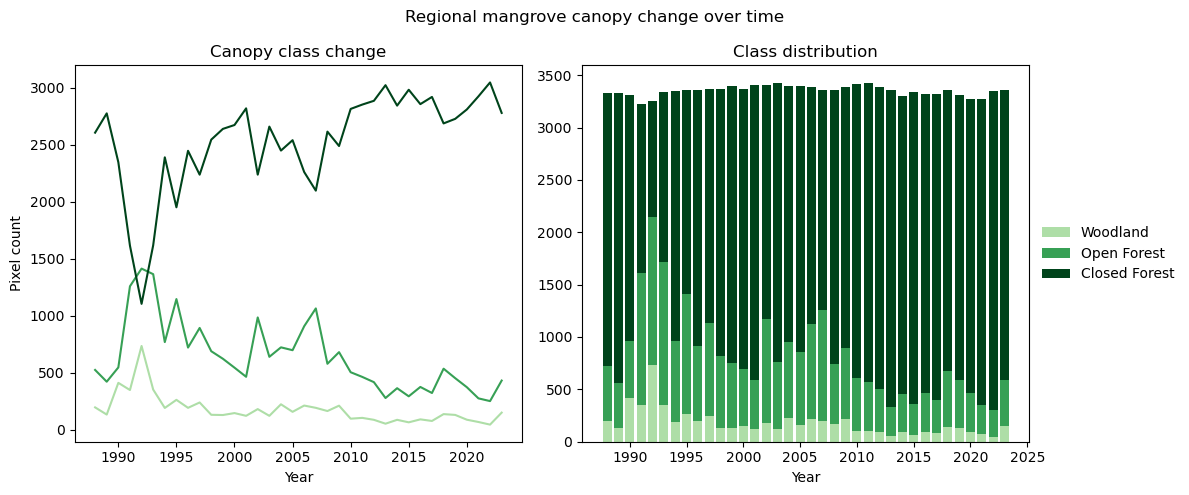

In [10]:
# Set up the data for plotting: count the number of pixels per class in the loaded location
mangroves["closed_forest"]= mangroves.canopy_cover_class.where(mangroves.canopy_cover_class == 3)
mangroves["open_forest"] = mangroves.canopy_cover_class.where(mangroves.canopy_cover_class == 2)
mangroves["woodland"] = mangroves.canopy_cover_class.where(mangroves.canopy_cover_class == 1)

y1 = mangroves["woodland"].count(dim=["y", "x"])
y2 = mangroves["open_forest"].count(dim=["y", "x"])
y3 = mangroves["closed_forest"].count(dim=["y", "x"])

# Simplify the date labels for the x-axis
x = np.arange(int(query["time"][0]), int(query["time"][-1]) + 1, 1)

# Prepare the figures
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Regional mangrove canopy change over time")

# Plot the single class summaries
axs[0].plot(x, y1, color="#aedea7", label="Woodland")
axs[0].plot(x, y2, color="#37a055", label="Open Forest")
axs[0].plot(x, y3, color="#00441b", label="Closed Forest")
axs[0].set_title("Canopy class change")
axs[0].set(ylabel="Pixel count", xlabel="Year")

# Stack the classes to plot a snapshot of the region at each time step
axs[1].bar(x, y1, color="#aedea7", label="Woodland")
axs[1].bar(x, y2, color="#37a055", label="Open Forest", bottom=y1)
axs[1].bar(x, y3, color="#00441b", label="Closed Forest", bottom=(y1 + y2))
axs[1].legend(bbox_to_anchor=(1.0, 0.5), loc="center left", frameon=False)
axs[1].set_title("Class distribution")
axs[1].set(xlabel="Year")

plt.tight_layout()
plt.show()

## Example applications

### Detect change hotspots in each class

Identify change hotspots in the analysis area by assessing the frequency that each class was identified during the length of the timeseries.

Pale yellow coloured areas signify pixels that have a high frequency of being identified as the class of interest over the length of the timeseries and were consistently modelled as that class.
Orange to red areas are pixels that were less frequently identified as the class of interest during the timeseries and thus, experienced change between classes during the timeseries.

In [11]:
#Convert mangroves from xarray.Dataset to gpd

import xarray as xr

df= mangroves.to_dataframe().reset_index()
df.head()

,time,y,x,spatial_ref,canopy_cover_class,masked,closed_forest,open_forest,woodland
0,1988-07-01 23:59:59.999999,-3125175.0,2048625.0,3577,255,NaN,NaN,NaN,NaN
1,1988-07-01 23:59:59.999999,-3125175.0,2048655.0,3577,255,NaN,NaN,NaN,NaN
2,1988-07-01 23:59:59.999999,-3125175.0,2048685.0,3577,255,NaN,NaN,NaN,NaN
3,1988-07-01 23:59:59.999999,-3125175.0,2048715.0,3577,255,NaN,NaN,NaN,NaN
4,1988-07-01 23:59:59.999999,-3125175.0,2048745.0,3577,255,NaN,NaN,NaN,NaN


In [12]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['x'], df['y'])]

gdf_mangroves = gpd.GeoDataFrame(df, geometry=geometry)

gdf_mangroves.set_crs("EPSG:3577", inplace=True)

gdf_mangroves.head()

,time,y,x,spatial_ref,canopy_cover_class,masked,closed_forest,open_forest,woodland,geometry
0,1988-07-01 23:59:59.999999,-3125175.0,2048625.0,3577,255,NaN,NaN,NaN,NaN,POINT (2048625.000 -3125175.000)
1,1988-07-01 23:59:59.999999,-3125175.0,2048655.0,3577,255,NaN,NaN,NaN,NaN,POINT (2048655.000 -3125175.000)
2,1988-07-01 23:59:59.999999,-3125175.0,2048685.0,3577,255,NaN,NaN,NaN,NaN,POINT (2048685.000 -3125175.000)
3,1988-07-01 23:59:59.999999,-3125175.0,2048715.0,3577,255,NaN,NaN,NaN,NaN,POINT (2048715.000 -3125175.000)
4,1988-07-01 23:59:59.999999,-3125175.0,2048745.0,3577,255,NaN,NaN,NaN,NaN,POINT (2048745.000 -3125175.000)


In [13]:
import os

# Change the directory to the folder where the file is saved
os.chdir('/home/jovyan/Research Project NB')

# Now you can try loading the file
import geopandas as gpd
deacl_ratesofchange_gdf = gpd.read_file('Pine_ratesofchange_gdf.geojson')

# Check the first few rows to ensure it loaded correctly
print(deacl_ratesofchange_gdf.head())

#A point dataset providing robust rates of coastal change for every 30 m along Australia’s non-rocky coastlines
#The most recent annual shoreline is used as a baseline for measuring rates of change (2023).


                        id         uid  rate_time  sig_time  se_time  \
0  rates_of_change.1347732  r7hufcw8cs      -1.46     0.001     0.41   
1  rates_of_change.1347717  r7hufcw07y      -1.47     0.000     0.33   
2  rates_of_change.1347715  r7hufct8jb      -1.30     0.000     0.33   
3  rates_of_change.1347720  r7hufcw2f8      -1.40     0.000     0.36   
4  rates_of_change.1347716  r7hufctbku      -1.60     0.000     0.33   

  outl_time  dist_1988  dist_1989  dist_1990  dist_1991  ...  angle_std  \
0      None      54.34       1.75       4.68       0.73  ...         26   
1      None      42.52      22.38      19.91       8.71  ...         15   
2      None      59.33      15.71      17.10       4.91  ...         19   
3      None      44.37       9.36       8.53       4.52  ...         14   
4      None      49.23      25.79      25.85       8.53  ...         16   

   valid_obs  valid_span    sce    nsm  max_year  min_year  certainty  \
0         37          37  97.90 -54.34     

In [14]:
# Check CRS of both GeoDataFrames
print(gdf_mangroves.crs)
print(deacl_ratesofchange_gdf.crs)

# If they are not in the same CRS, reproject them
if gdf_mangroves.crs != deacl_ratesofchange_gdf.crs:
    deacl_ratesofchange_gdf = deacl_ratesofchange_gdf.to_crs(gdf_mangroves.crs)


EPSG:3577
EPSG:3577


In [15]:
import geopandas as gpd
from shapely.geometry import Point, box

# Function to convert point to 30x30 meter square polygon
def point_to_square(point, size=30):
    # Calculate half the size for the buffer
    half_size = size / 2
    
    # Create a bounding box (square) centered on the point
    minx = point.x - half_size
    miny = point.y - half_size
    maxx = point.x + half_size
    maxy = point.y + half_size
    
    # Create a square polygon
    return box(minx, miny, maxx, maxy)

# Apply the function to convert the points in mangroves to square polygons
gdf_mangroves['geometry'] = gdf_mangroves['geometry'].apply(lambda x: point_to_square(x, size=30))
# Convert to GeoDataFrame with proper CRS (ensure the CRS is set)
gdf_mangroves = gpd.GeoDataFrame(gdf_mangroves, geometry='geometry', crs='EPSG:3577') 

In [16]:
years_of_interest = list(range(1988, 2023))
results = []

for year in years_of_interest:
    shoreline_data = deacl_ratesofchange_gdf[['geometry', f'dist_{year}']].copy()
    shoreline_data['year'] = year
    
    mangrove_data = gdf_mangroves[gdf_mangroves['time'].dt.year == year]
    
    # Perform spatial join
    joined = gpd.sjoin(shoreline_data, mangrove_data, how='inner', predicate='intersects')
    
    # Extract relevant data and analyze changes (e.g., how mangrove cover class has changed)
    for idx, row in joined.iterrows():
        # Extract mangrove cover class (closed_forest, open_forest, woodland) for each point
        mangrove_cover = row[['geometry','masked','closed_forest', 'open_forest', 'woodland']]
        
        # Track how mangrove cover has changed over time
        results.append({
            'year': year,
            'shoreline_position': row['dist_' + str(year)],
            'geometry': mangrove_cover['geometry'],
            'masked': mangrove_cover['masked'],
            'closed_forest': mangrove_cover['closed_forest'],
            'open_forest': mangrove_cover['open_forest'],
            'woodland': mangrove_cover['woodland']
        })

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)
results_df.tail(100)
#joined.head()

,year,shoreline_position,geometry,masked,closed_forest,open_forest,woodland
6865,2022,-0.14,POINT (2050090.24871719 -3126975.00600749),3.0,3.0,NaN,NaN
6866,2022,-0.06,POINT (2049973.68907556 -3126954.42752471),3.0,3.0,NaN,NaN
6867,2022,0.96,POINT (2049944.44566546 -3126949.58448319),3.0,3.0,NaN,NaN
6868,2022,0.72,POINT (2049915.57862782 -3126943.00994317),3.0,3.0,NaN,NaN
6869,2022,4.70,POINT (2049310.76230752 -3126950.96883694),NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6960,2022,0.71,POINT (2050695.57534003 -3125576.23780304),3.0,3.0,NaN,NaN
6961,2022,-0.23,POINT (2050712.0057799 -3125552.2587303),NaN,NaN,NaN,NaN
6962,2022,0.24,POINT (2050735.56224235 -3125533.65715627),3.0,3.0,NaN,NaN
6963,2022,1.83,POINT (2052158.85516305 -3125667.43078932),2.0,NaN,2.0,NaN


In [17]:
import geopandas as gpd

# Assuming your GeoDataFrame is named 'gdf'
results_df['masked'] = results_df['masked'].fillna(0)

# Check if the NaN values were replaced
results_df.tail(94)


,year,shoreline_position,geometry,masked,closed_forest,open_forest,woodland
6871,2022,-1.57,POINT (2049254.92065303 -3126940.31920919),0.0,NaN,NaN,NaN
6872,2022,2.79,POINT (2049284.5779065 -3126940.10162567),0.0,NaN,NaN,NaN
6873,2022,2.12,POINT (2049483.12851809 -3126939.52386845),0.0,NaN,NaN,NaN
6874,2022,-0.31,POINT (2049886.71640198 -3126937.37773662),3.0,3.0,NaN,NaN
6875,2022,0.27,POINT (2049857.09501587 -3126936.14460777),3.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...
6960,2022,0.71,POINT (2050695.57534003 -3125576.23780304),3.0,3.0,NaN,NaN
6961,2022,-0.23,POINT (2050712.0057799 -3125552.2587303),0.0,NaN,NaN,NaN
6962,2022,0.24,POINT (2050735.56224235 -3125533.65715627),3.0,3.0,NaN,NaN
6963,2022,1.83,POINT (2052158.85516305 -3125667.43078932),2.0,NaN,2.0,NaN


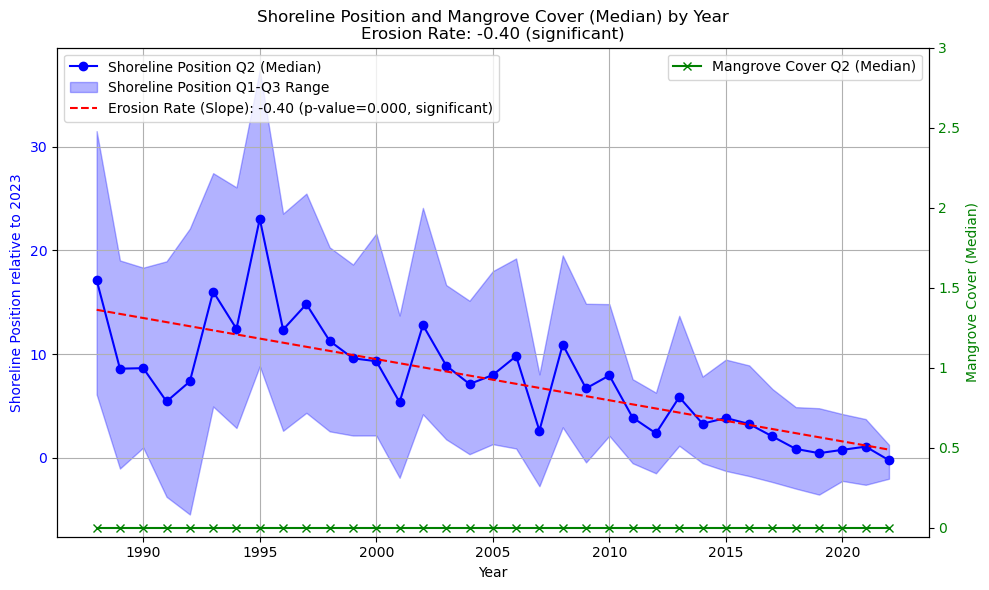

Erosion Rate (Slope): -0.40
P-value for slope: 0.000
Slope significance: significant


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Assuming 'results_df' is your DataFrame

# Calculate the Q1, Q2 (median), and Q3 for 'shoreline_position' and 'masked' values grouped by 'year'
results_percentiles = results_df.groupby('year').agg({
    'shoreline_position': ['quantile'],
    'masked': ['quantile']
})

# Calculate the desired quantiles for shoreline_position and masked values
results_percentiles['shoreline_position_Q1'] = results_df.groupby('year')['shoreline_position'].quantile(0.25)
results_percentiles['shoreline_position_Q2'] = results_df.groupby('year')['shoreline_position'].quantile(0.50)  # Median
results_percentiles['shoreline_position_Q3'] = results_df.groupby('year')['shoreline_position'].quantile(0.75)

results_percentiles['masked_Q1'] = results_df.groupby('year')['masked'].quantile(0.25)
results_percentiles['masked_Q2'] = results_df.groupby('year')['masked'].quantile(0.50)  # Median
results_percentiles['masked_Q3'] = results_df.groupby('year')['masked'].quantile(0.75)

# Reset index to make 'year' a column
results_percentiles = results_percentiles.reset_index()

# Erosion rate calculation: Calculate the change in shoreline position (Q2) through time
years = results_percentiles['year']
shoreline_position_median = results_percentiles['shoreline_position_Q2']

# Linear regression to get the slope of shoreline position
slope, intercept, r_value, p_value, std_err = linregress(years, shoreline_position_median)

# Check if slope is significantly different from zero (p-value < 0.05 indicates significance)
if p_value < 0.05:
    slope_significance = "significant"
else:
    slope_significance = "not significant"

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for shoreline_position with shaded error (Q1 to Q3 as error bounds)
ax1.plot(results_percentiles['year'], results_percentiles['shoreline_position_Q2'], label='Shoreline Position Q2 (Median)', color='blue', marker='o')
ax1.fill_between(results_percentiles['year'], results_percentiles['shoreline_position_Q1'], results_percentiles['shoreline_position_Q3'], 
                 color='blue', alpha=0.3, label='Shoreline Position Q1-Q3 Range')

# Set labels for the first y-axis (shoreline_position)
ax1.set_xlabel('Year')
ax1.set_ylabel('Shoreline Position relative to 2023', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add the regression line (Erosion rate)
ax1.plot(years, slope * years + intercept, label=f'Erosion Rate (Slope): {slope:.2f} (p-value={p_value:.3f}, {slope_significance})', color='red', linestyle='--')

# Create the second y-axis for Mangrove Cover (formerly 'masked')
ax2 = ax1.twinx()

# Plot for Mangrove Cover (masked), without error range (no fill_between)
ax2.plot(results_percentiles['year'], results_percentiles['masked_Q2'], label='Mangrove Cover Q2 (Median)', color='green', marker='x')

# Set labels for the second y-axis (Mangrove Cover)
ax2.set_ylabel('Mangrove Cover (Median)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Scale the second y-axis between 0 and 3 with 0.5 increments (including zero)
ax2.set_yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
ax2.set_yticklabels([0, 0.5, 1, 1.5, 2, 2.5, 3])

# Add title and grid
ax1.set_title(f'Shoreline Position and Mangrove Cover (Median) by Year\nErosion Rate: {slope:.2f} ({slope_significance})')
ax1.grid(True)

# Add a legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
fig.tight_layout()
plt.show()

# Output the slope and p-value for the regression analysis
# Output the slope and p-value for the regression analysis
print(f"Erosion Rate (Slope): {slope:.2f}")
print(f"P-value for slope: {p_value:.3f}")
print(f"Slope significance: {slope_significance}")

In [19]:
print(f"Standard Error of the Slope: {std_err:.3f}")

Standard Error of the Slope: 0.059


***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Discord chat](https://discord.com/invite/4hhBQVas5U) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [GitHub](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** December 2023

**Compatible datacube version:** 1.8.13

In [20]:
print(datacube.__version__)

1.8.19


## Tags
<!-- Browse all available tags on the DEA User Guide's [Tags Index](https://knowledge.dea.ga.gov.au/genindex/) -->

Summary of mangrove_change categories:
mangrove_change
None         4180
Open          709
Closed        672
Increased     658
Decreased     538
Woodland      208
Name: count, dtype: int64
Open category count: 709
Woodland category count: 208
ANOVA results: F-statistic = 85.30402141234904, p-value = 2.7796733222081422e-87
There is a statistically significant difference in erosion across mangrove change categories.

Tukey HSD results:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower    upper  reject
-----------------------------------------------------------
   Closed Decreased -12.5071    0.0 -15.3755 -9.6387   True
   Closed Increased  -1.6929 0.4824  -4.4122  1.0264  False
   Closed      None    0.797 0.8805  -1.2637  2.8577  False
   Closed      Open  -7.2168    0.0  -9.8862 -4.5474   True
   Closed  Woodland -10.6419    0.0 -14.5761 -6.7078   True
Decreased Increased  10.8142    0.0   7.9322 13.6962   True
Decreased      None  1

/tmp/ipykernel_528/1019045119.py:121: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=results_df_clean, x='mangrove_change', y='erosion', order=order, color='red', markers='o', join=False)


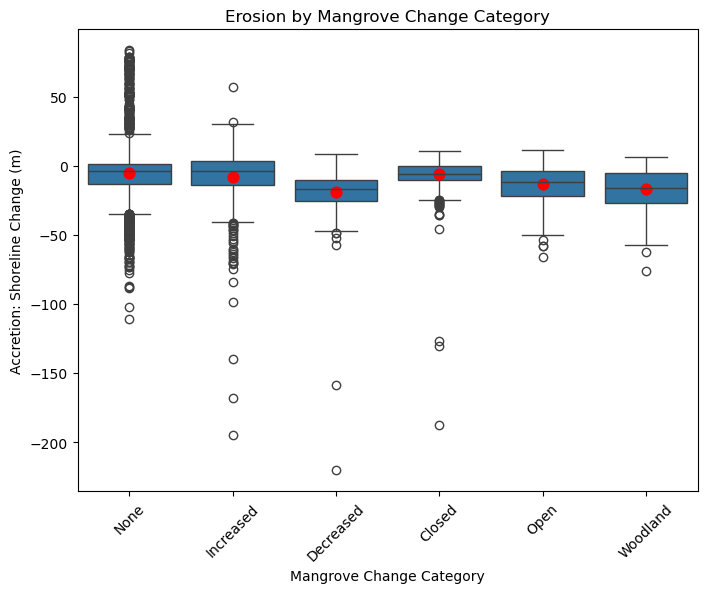

In [23]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Step 1: Identify the cover data for each location using 2022 cover
cover_2022 = results_df[results_df['year'] == 2022][['geometry', 'masked']].set_index('geometry')['masked'].to_dict()

# Step 2: Define the mangrove_change function relative to the 2022 cover
def mangrove_change(row):
    # Get the mangrove cover for this location in 2022
    cover_2022_value = cover_2022.get(row['geometry'], None)
    
    # If there's no data for this geometry in 2022, return 'Other'
    if cover_2022_value is None:
        print(f"Missing 2022 cover for geometry {row['geometry']} in year {row['year']}")
        return 'Other'  # If there's no data, return 'Other'
    
    # Define the categorization rules based on the 2022 cover
    cover_map = {
        (3, 3): 'Closed', 
        (3, 2): 'Decreased', 
        (3, 1): 'Decreased', 
        (3, 0): 'Decreased', 
        (2, 3): 'Increased', 
        (2, 2): 'Open',  
        (2, 1): 'Decreased', 
        (2, 0): 'Decreased', 
        (1, 3): 'Increased', 
        (1, 2): 'Increased', 
        (1, 1): 'Woodland', 
        (1, 0): 'Decreased', 
        (0, 3): 'Increased', 
        (0, 2): 'Increased', 
        (0, 1): 'Increased', 
        (0, 0): 'None'
    }
    
    # Map the change based on the year-wise cover change relative to 2022
    change_category = cover_map.get((row['masked'], cover_2022_value), 'Other')
    
    # Debugging: Check the categorization for each row
    if change_category == 'Other':
        print(f"Unmapped combination: Year {row['year']} | Current cover {row['masked']} | 2022 cover {cover_2022_value}")
    
    return change_category

# Step 3: Apply mangrove_change to determine mangrove change for each row
results_df['mangrove_change'] = results_df.apply(mangrove_change, axis=1)

# Step 4: Print a summary of the 'mangrove_change' column to check the distribution of categories
print("Summary of mangrove_change categories:")
print(results_df['mangrove_change'].value_counts())

# Check if 'Open' and 'Woodland' are included
print(f"Open category count: {results_df[results_df['mangrove_change'] == 'Open'].shape[0]}")
print(f"Woodland category count: {results_df[results_df['mangrove_change'] == 'Woodland'].shape[0]}")

# Step 5: Exclude the 'Other' category and clean the data by dropping any NaN values
results_df_clean = results_df[results_df['mangrove_change'] != 'Other']
results_df_clean = results_df_clean.dropna(subset=['shoreline_position', 'mangrove_change'])

# Step 6: Create the 'erosion' column relative to shoreline position in 2022
# Subtract the shoreline position in 2022 from the current shoreline position, then multiply by -1
# Step 6.1: Create a dictionary for the shoreline position in 2022
shoreline_2022 = results_df[results_df['year'] == 2022][['geometry', 'shoreline_position']].set_index('geometry')['shoreline_position'].to_dict()

# Step 6.2: Create 'erosion' column relative to shoreline position in 2022
def calculate_erosion(row):
    shoreline_2022_value = shoreline_2022.get(row['geometry'], None)
    
    # If there's no data for this geometry in 2022, return NaN for erosion
    if shoreline_2022_value is None:
        return np.nan
    
    # Calculate erosion: (current shoreline position - 2022 shoreline position) * -1
    erosion = (row['shoreline_position'] - shoreline_2022_value) * -1
    return erosion

# Apply the erosion calculation
results_df_clean['erosion'] = results_df_clean.apply(calculate_erosion, axis=1)

# Step 7: Perform one-way ANOVA to determine if erosion differs between mangrove change categories
anova_results = stats.f_oneway(
    results_df_clean[results_df_clean['mangrove_change'] == 'Closed']['erosion'],
    results_df_clean[results_df_clean['mangrove_change'] == 'Decreased']['erosion'],
    results_df_clean[results_df_clean['mangrove_change'] == 'Increased']['erosion'],
    results_df_clean[results_df_clean['mangrove_change'] == 'None']['erosion'],
    results_df_clean[results_df_clean['mangrove_change'] == 'Open']['erosion'],
    results_df_clean[results_df_clean['mangrove_change'] == 'Woodland']['erosion']
)

# Output the results of ANOVA
print(f"ANOVA results: F-statistic = {anova_results.statistic}, p-value = {anova_results.pvalue}")

# Check if p-value is less than 0.05 (statistically significant difference)
if anova_results.pvalue < 0.05:
    print("There is a statistically significant difference in erosion across mangrove change categories.")
else:
    print("There is no statistically significant difference in erosion across mangrove change categories.")

# Step 8: Perform Tukey's HSD test for pairwise comparisons
tukey_results = pairwise_tukeyhsd(endog=results_df_clean['erosion'], 
                                  groups=results_df_clean['mangrove_change'], 
                                  alpha=0.05)

# Display the Tukey HSD results
print("\nTukey HSD results:")
print(tukey_results.summary())

# Step 9: Visualize the distribution of erosion by mangrove change category
# Define the desired order for the categories on the x-axis
order = ['None', 'Increased', 'Decreased', 'Closed', 'Open', 'Woodland']

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=results_df_clean, x='mangrove_change', y='erosion', order=order)

# Overlay with mean values as red dots
sns.pointplot(data=results_df_clean, x='mangrove_change', y='erosion', order=order, color='red', markers='o', join=False)

# Adjust labels and title
plt.title('Erosion by Mangrove Change Category')
plt.xlabel('Mangrove Change Category')
plt.ylabel('Accretion: Shoreline Change (m)')
plt.xticks(rotation=45)

plt.show()


In [22]:
# Summary Statistics
print("\nSummary statistics by mangrove change category:")
summary_stats = results_df_clean.groupby('mangrove_change')['erosion'].describe()
print(summary_stats)



Summary statistics by mangrove change category:
                  count       mean        std     min      25%     50%  \
mangrove_change                                                          
Closed            672.0  -6.111563  12.578195 -187.64  -9.9300  -5.645   
Decreased         538.0 -18.618662  15.315994 -220.45 -25.3500 -16.915   
Increased         658.0  -7.804438  20.008375 -194.75 -14.0325  -3.945   
None             4180.0  -5.314529  18.775145 -111.21 -13.1725  -3.855   
Open              709.0 -13.328350  11.605394  -66.34 -22.1300 -12.010   
Woodland          208.0 -16.753510  14.229907  -76.14 -26.5925 -15.760   

                    75%    max  
mangrove_change                 
Closed           -0.235  10.90  
Decreased       -10.155   8.26  
Increased         3.810  56.95  
None              1.370  83.40  
Open             -3.600  11.20  
Woodland         -5.255   6.41  
